In [2]:
# Import Tensorflow 2.0
import tensorflow as tf 
import cv2
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm



In [4]:

mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 25s 2us/step


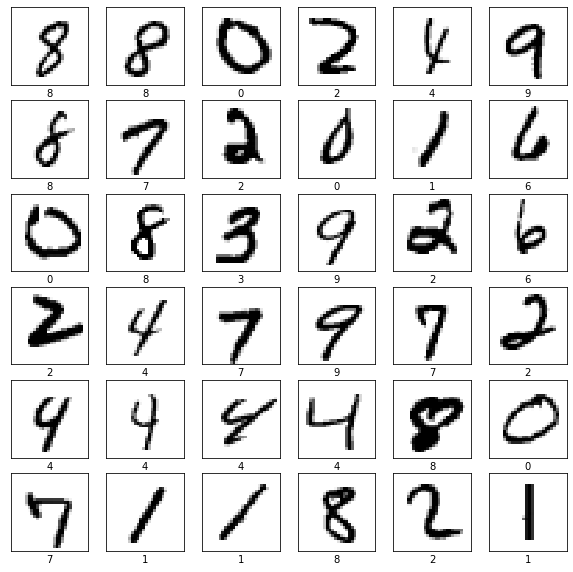

In [5]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [8]:

def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # '''TODO: Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation= 'sigmoid'),

      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation= 'sigmoid'),
      
  ])
  return fc_model

model = build_fc_model()

In [9]:
'''TODO: Experiment with different optimizers and learning rates. How do these affect
    the accuracy of the trained model? Which optimizers and/or learning rates yield
    the best performance?'''

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 32
EPOCHS = 50

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0400 - accuracy: 0.9898
Epoch 2/50
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0342 - accuracy: 0.9914
Epoch 3/50
60000/60000 [==============================] - 12s 192us/sample - loss: 0.0285 - accuracy: 0.9934
Epoch 4/50
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0247 - accuracy: 0.9947
Epoch 5/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0204 - accuracy: 0.9959
Epoch 6/50
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0175 - accuracy: 0.9967
Epoch 7/50
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0147 - accuracy: 0.9978
Epoch 8/50
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0122 - accuracy: 0.9983
Epoch 9/50
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0104 - accuracy: 0.9987
Epoc

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=16 )

print('Test accuracy:', test_acc)
print('Test loss:',test_loss)

10000/10000 [==============================] - 2s 159us/sample - loss: 0.1015 - accuracy: 0.9795
Test accuracy: 0.9795
Test loss: 0.10153395021277302


In [20]:
## CNN to do the same task
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(24, (3,3), activation = 'relu' ), 

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size = (2,2)),

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(36, (3,3), activation = 'relu' ),

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size = (2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        
        tf.keras.layers.Dense(10, activation= 'sigmoid'),
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  115328    
_________________________________________________________________
dense_5 (Dense)              multiple                 

In [21]:
#defining optimizer 
cnn_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # TODO

In [22]:
#training 
BATCH_SIZE = 64
EPOCHS = 5

cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.2032 - accuracy: 0.9398
Epoch 2/5
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.0637 - accuracy: 0.9806
Epoch 3/5
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0448 - accuracy: 0.9861
Epoch 4/5
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.0353 - accuracy: 0.9891
Epoch 5/5
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0269 - accuracy: 0.9914


In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=16 )

print('Test accuracy:', test_acc)
print('Test loss:',test_loss)

10000/10000 [==============================] - 2s 172us/sample - loss: 0.1015 - accuracy: 0.9795
Test accuracy: 0.9795
Test loss: 0.10153395021277302


In [24]:
predictions = cnn_model.predict(test_images)

In [25]:
predictions[0]

array([6.7410078e-10, 1.9601165e-08, 9.6755628e-08, 7.8409869e-07,
       6.9320587e-12, 3.1758762e-09, 3.1646239e-16, 9.8801476e-01,
       7.5655784e-08, 5.6149088e-07], dtype=float32)

In [29]:
prediction = np.argmax(predictions[0])
print('predicted value :',prediction)

predicted value : 7


Label of this digit is: 7


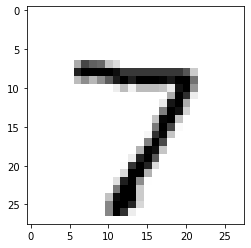

In [28]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

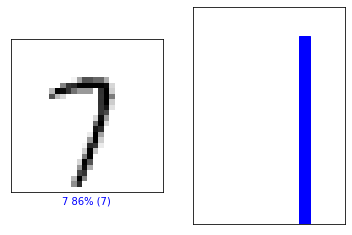

In [32]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 229 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

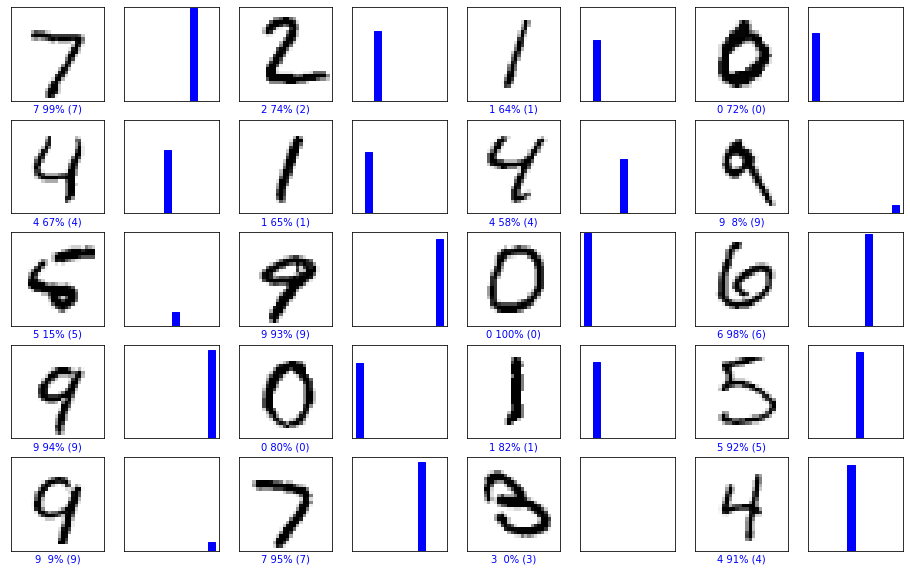

In [33]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

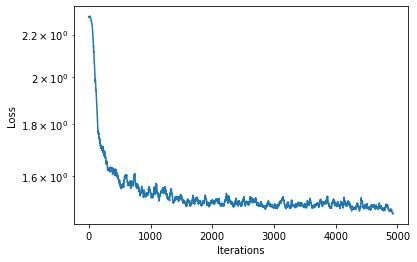

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [02:38<00:00, 31.53it/s]


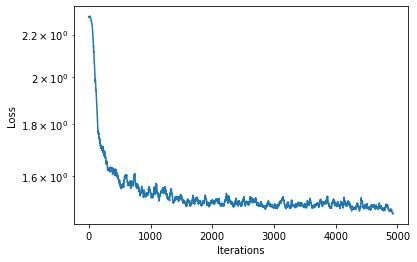

In [36]:
### second model 

# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    #'''TODO: feed the images into the model and obtain the predictions'''
    logits = cnn_model(images)

    #'''TODO: compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy( labels, logits, from_logits=True) # TODO

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  '''TODO: Use the tape to compute the gradient against all parameters in the CNN model.
      Use cnn_model.trainable_variables to access these parameters.''' 
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))